In [ ]:
# links para ajuda no trabalho
# https://towardsdatascience.com/using-the-strava-api-and-pandas-to-explore-your-activity-data-d94901d9bfde
# https://www.youtube.com/watch?v=KXUxGUKtcbM
# https://knanne.github.io/notebooks/visualize_strava_data_in_python.html

In [611]:
# #Installing and importing the calmap library
# !pip install calmap



# Objetivo - avaliar minha performance na corrida e prever esforço

In [812]:
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import calmap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [813]:

df = json_normalize(my_dataset)

In [814]:
print('Shape da database',df.shape)
df

Shape da database (121, 53)


,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,start_date,...,total_photo_count,has_kudoed,suffer_score,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,elev_high,elev_low
0,2,Afternoon Run,5024.9,1843,1843,0.0,Run,NaN,7073164223,2022-05-01T20:14:46Z,...,0,False,75.0,45443062,1,a7073164223,None,2,NaN,NaN
1,2,Morning Activity,0.0,3430,3430,0.0,WeightTraining,NaN,6985617462,2022-04-15T12:43:47Z,...,0,False,10.0,45443062,1,a6985617462,None,2,NaN,NaN
2,2,Morning Run,4082.4,1410,1428,36.0,Run,NaN,6974687444,2022-04-13T11:13:22Z,...,0,False,47.0,45443062,1,a6974687444,`v}_Cxd|iHIz@BNGRGf@GVMhA@n@Kl@MnA?z@IPEBuCi@a...,2,520.6,491.1
3,2,Morning Activity,0.0,2540,2540,0.0,WeightTraining,NaN,6696833399,2022-02-17T09:42:07Z,...,0,False,6.0,45443062,1,a6696833399,None,2,NaN,NaN
4,2,Morning Activity,0.0,2369,2369,0.0,WeightTraining,NaN,6690883902,2022-02-16T09:37:32Z,...,0,False,7.0,45443062,1,a6690883902,None,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2,bike filial,10252.6,1986,2237,106.9,Run,0.0,2708445962,2019-09-14T16:58:13Z,...,0,False,NaN,45443062,1,a2708445962,tdtjC`xb~Go@kACMOQ?HEAGNEE?EEDQ`@?FTTXNLLLb@D^...,2,692.4,602.0
117,2,bike to madrid,10226.8,2838,3304,220.6,Run,0.0,2706036175,2019-09-13T23:21:26Z,...,0,False,NaN,45443062,1,a2706036175,rhijCbri~GAFEUI@?D@LHF@EC]He@A[DKAGOUO[][MSoAs...,2,714.1,600.1
118,2,corrida boa,5549.8,1891,2170,96.7,Run,0.0,2645261561,2019-08-23T21:47:27Z,...,0,False,NaN,45443062,1,a2645261561,ragjC|zh~GEEIA@GKUUKg@i@i@YaAsAAWKc@AWOQKq@IYM...,2,647.7,582.3
119,2,#3,5213.2,2005,2080,53.9,Run,0.0,2631069826,2019-08-18T20:16:24Z,...,0,False,NaN,45443062,1,a2631069826,befjCpji~GFKLGj@q@l@]ROT]RO^g@ZWN_@f@m@NI^a@^C...,2,590.1,580.6


In [815]:
for var in df:
    print(var, 'tipo ', df[var].dtype.name)


resource_state tipo  int64
name tipo  object
distance tipo  float64
moving_time tipo  int64
elapsed_time tipo  int64
total_elevation_gain tipo  float64
type tipo  object
workout_type tipo  float64
id tipo  int64
start_date tipo  object
start_date_local tipo  object
timezone tipo  object
utc_offset tipo  float64
location_city tipo  object
location_state tipo  object
location_country tipo  object
achievement_count tipo  int64
kudos_count tipo  int64
comment_count tipo  int64
athlete_count tipo  int64
photo_count tipo  int64
trainer tipo  bool
commute tipo  bool
manual tipo  bool
private tipo  bool
visibility tipo  object
flagged tipo  bool
gear_id tipo  object
start_latlng tipo  object
end_latlng tipo  object
average_speed tipo  float64
max_speed tipo  float64
average_cadence tipo  float64
has_heartrate tipo  bool
average_heartrate tipo  float64
max_heartrate tipo  float64
heartrate_opt_out tipo  bool
display_hide_heartrate_option tipo  bool
upload_id tipo  int64
upload_id_str tipo  obje

In [816]:
cols = ['start_date_local','name', 'upload_id','type','distance','moving_time','average_speed',
        'max_speed','total_elevation_gain','has_heartrate', 
        'average_heartrate', 'max_heartrate', 'suffer_score'
        ]

df = df[cols]

df.head()


,start_date_local,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,has_heartrate,average_heartrate,max_heartrate,suffer_score
0,2022-05-01T17:14:46Z,Afternoon Run,7529394092,Run,5024.9,1843,2.726,3.244,0.0,True,164.6,177.0,75.0
1,2022-04-15T09:43:47Z,Morning Activity,7434335978,WeightTraining,0.0,3430,0.000,0.000,0.0,True,109.4,139.0,10.0
2,2022-04-13T08:13:22Z,Morning Run,7422503963,Run,4082.4,1410,2.895,4.910,36.0,True,160.2,175.0,47.0
3,2022-02-17T06:42:07Z,Morning Activity,7122159021,WeightTraining,0.0,2540,0.000,0.000,0.0,True,102.2,127.0,6.0
4,2022-02-16T06:37:32Z,Morning Activity,7115779334,WeightTraining,0.0,2369,0.000,0.000,0.0,True,109.7,146.0,7.0


In [817]:
#Quebrando o timestamp em data e hora em duas colunas

df['start_date_local'] = pd.to_datetime(df['start_date_local'])

df.insert(0, "date", df['start_date_local'].dt.date)
df.insert(1, "time", df['start_date_local'].dt.time)


/var/folders/21/308cczgn1kl8f8btms113c8w0000gq/T/ipykernel_66932/1593739525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date_local'] = pd.to_datetime(df['start_date_local'])


In [819]:
df_run = df.loc[df['type'] == 'Run']
df_run.insert(1, "yyyy", df_run['start_date_local'].dt.year)

print('Shape da database de Runs',df_run.shape)
df_run.head(5)

Shape da database de Runs (57, 16)


,date,yyyy,time,start_date_local,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,has_heartrate,average_heartrate,max_heartrate,suffer_score
0,2022-05-01,2022,17:14:46,2022-05-01 17:14:46+00:00,Afternoon Run,7529394092,Run,5024.9,1843,2.726,3.244,0.0,True,164.6,177.0,75.0
2,2022-04-13,2022,08:13:22,2022-04-13 08:13:22+00:00,Morning Run,7422503963,Run,4082.4,1410,2.895,4.910,36.0,True,160.2,175.0,47.0
9,2022-02-06,2022,16:09:43,2022-02-06 16:09:43+00:00,Afternoon Run,7063498412,Run,5032.1,1601,3.143,4.636,9.7,True,169.9,179.0,77.0
19,2021-12-31,2021,08:15:07,2021-12-31 08:15:07+00:00,Morning Run,6858824412,Run,16259.0,6597,2.465,11.844,255.3,True,152.6,175.0,164.0
21,2021-12-02,2021,18:59:25,2021-12-02 18:59:25+00:00,Evening Run,6734418614,Run,7114.9,2653,2.682,4.662,10.7,True,144.8,166.0,43.0


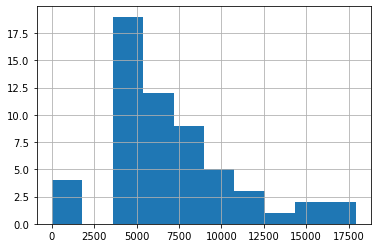

In [820]:
df_run['distance'].hist();

In [821]:
#Setting the date_time column as the index
df_run.set_index('date', inplace = True)
df_run.index = pd.DatetimeIndex(df_run.index)


In [822]:
print('menor data = ', min(df_run.index))
print('maior data = ', max(df_run.index))

menor data =  2019-08-16 00:00:00
maior data =  2022-05-01 00:00:00


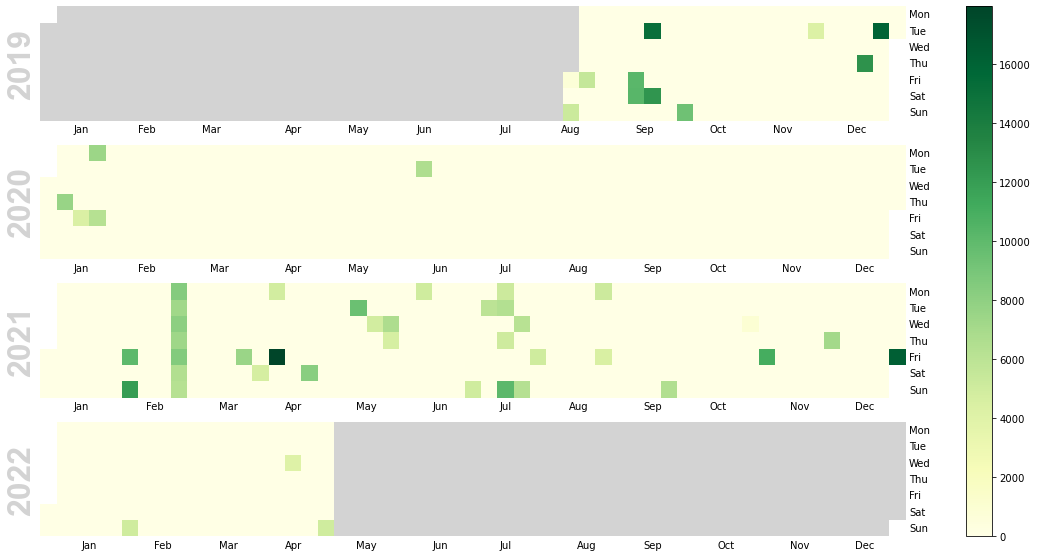

In [829]:
fig,ax=calmap.calendarplot(df_run['distance'],
                    fillcolor='lightgrey', linewidth=0,cmap='YlGn', 
                    fig_kws=dict(figsize=(17,8)))

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())